<a href="https://colab.research.google.com/github/dvisionst/Project_Two/blob/main/Project_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from IPython.core.pylabtools import figsize

In [2]:
df = pd.read_csv('/content/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


1) Source of data is Kaggle and the owner is Aditya Kadiwal

2) Brief description of data:
This data set shows nine different characteristics of water. These characteristics are pH, hardness, solids, chloramines, sulfate, conductivity, 
organic carbon, trihalomethanes, and turbidity. It also has a column that designates if the water is potable or not.

3) What is the target? The 'potability' column is the target

4) Is this a classification or regression problem? This is a classification problem

5) How many features? There are 10 columns.

6) How many rows of data. 3275 rows

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

This will be a challenge in terms of selecting the proper imputation strategy for missing values. Since I am trying to see if the water is safe to drink or not, I want to be able and determine the best way to handle missing values. 

I chose this data set beacuse I am interested in leveraging the power of machine learning for environmental causes. Sustainability and the environment are two areas in which I would prefer to apply my technical skills in. 

# Part 2

In [38]:
# using describe in order to see if there are any outlier values.
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [39]:
# looking for duplicated rows, dropping them, and veryfing zero duplicates.
df.duplicated().sum()

0

In [40]:
# Looking for missing values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

As can be seen in the histogram all of the features in this dataset are normally distibuted. This will allow me to decide which imputation strategy to use. I will use the median strategy on a simple imputer in order address the missing values. I would create a column selector, a mean imputer, and a scaler for this data in a pipeline before fitting it. 

the code would like like something in the block below that's been commented out. 

In [41]:
# This is the code as described in the text block above, commented out
# num_selector = make_column_selector(dtype_include='number')
# mean_imputer = SimpleImputer(strategy='mean')
# scaler = StandardScaler()
# num_pipe = make_pipeline(mean_imputer, scaler)

There are no categorical data types in this data set, so I don't need to deal with inconsistant naming. 

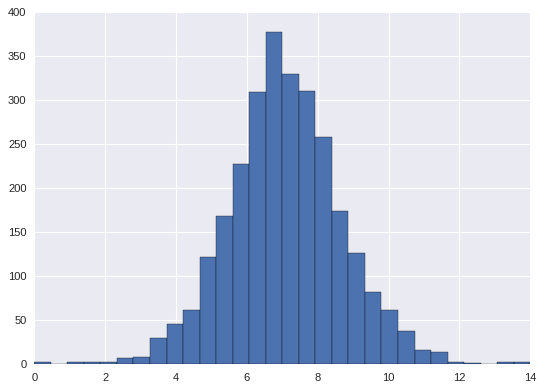

In [102]:
# normal distribution for the histogram plot of the water's ph levels
plt.style.use('seaborn')
df['ph'].hist(bins=30, edgecolor='black');

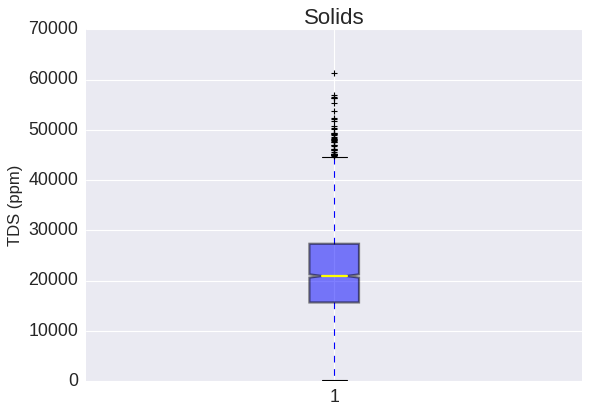

In [103]:
# creating a boxplot for the solids to see how skewed the data truly is
tds = df['Solids']
plt.boxplot([tds],
                        notch=True,
                        patch_artist=True,
                        widths=.1,
                        medianprops= dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .5)
                        );


plt.ylabel('TDS (ppm)', fontsize = 15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.title('Solids', fontdict={'fontsize': 20});

This boxplot of the Solids is showing a skewed distribution. The max value could be seen as an outlier. However, it seems to be in the area of other skewed values, thus I'll leave it alone. I will wait to see how it is scaled once I get to that part.  

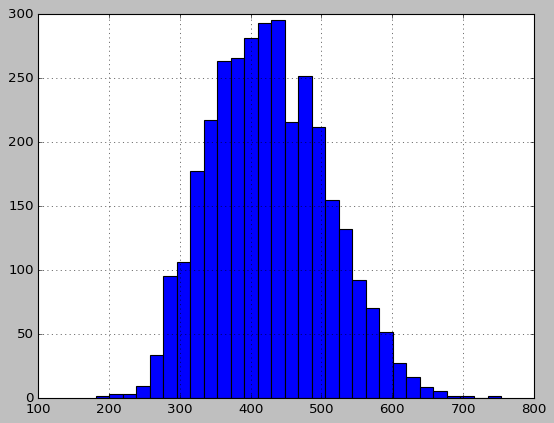

In [100]:
# classic histogram plot for the conductivity of the water
plt.style.use('classic')
df['Conductivity'].hist(bins=30, edgecolor='black');

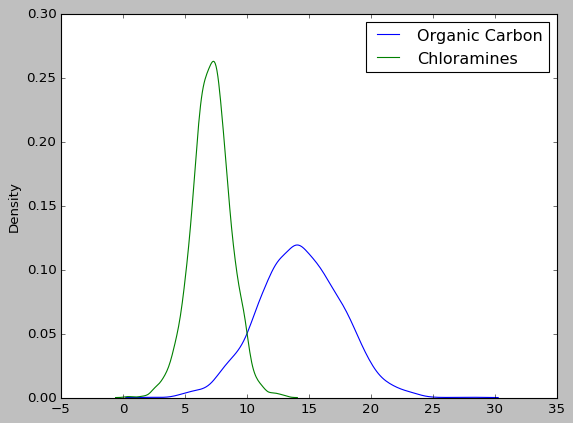

In [45]:
# Doing two distribution curves on same plot since Organic Carbon and 
# Cholormines are in the same units ppm (parts per million)
sns.kdeplot(df['Organic_carbon']);
sns.kdeplot(df['Chloramines']);
plt.xlabel('')
plt.legend(labels=['Organic Carbon', 'Chloramines']);

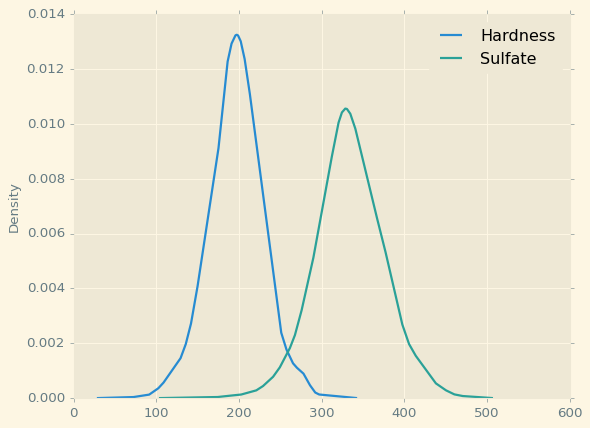

In [50]:
# Doing two distribution curves on same plot since Hardness and 
# Sulfates are in the same units mg/L
plt.style.use('Solarize_Light2')
sns.kdeplot(df['Hardness']);
sns.kdeplot(df['Sulfate']);
plt.xlabel('')
plt.legend(labels=['Hardness','Sulfate']);

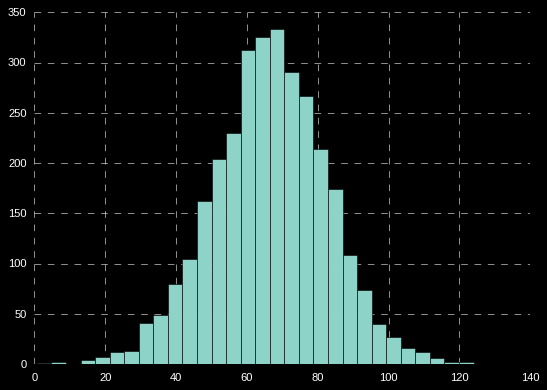

In [99]:
# histogram for the Trihalomethanes which shows a normal distribution
plt.style.use('dark_background')
df['Trihalomethanes'].hist(bins=30, edgecolor='black');

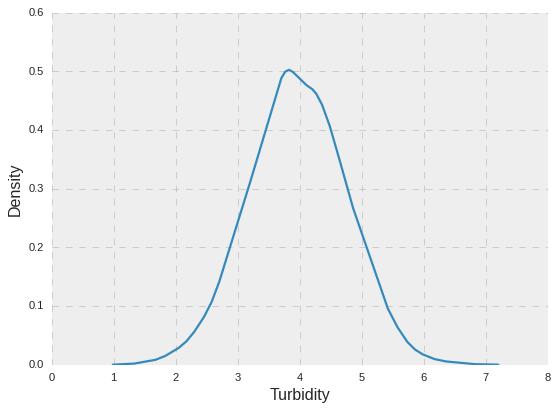

In [97]:
# distribution plot for turbidity which is a measure of light emitting 
# properties of the water
plt.style.use('bmh')
sns.kdeplot(df['Turbidity']);

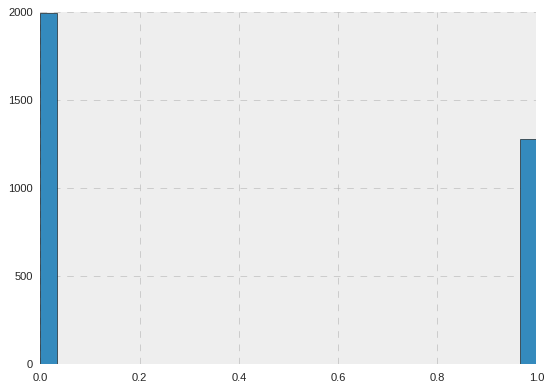

In [98]:
# potability histogram showing that the dataset has more non-potable rows
plt.style.use('bmh')
df['Potability'].hist(bins=30, edgecolor='black');

# Part 3

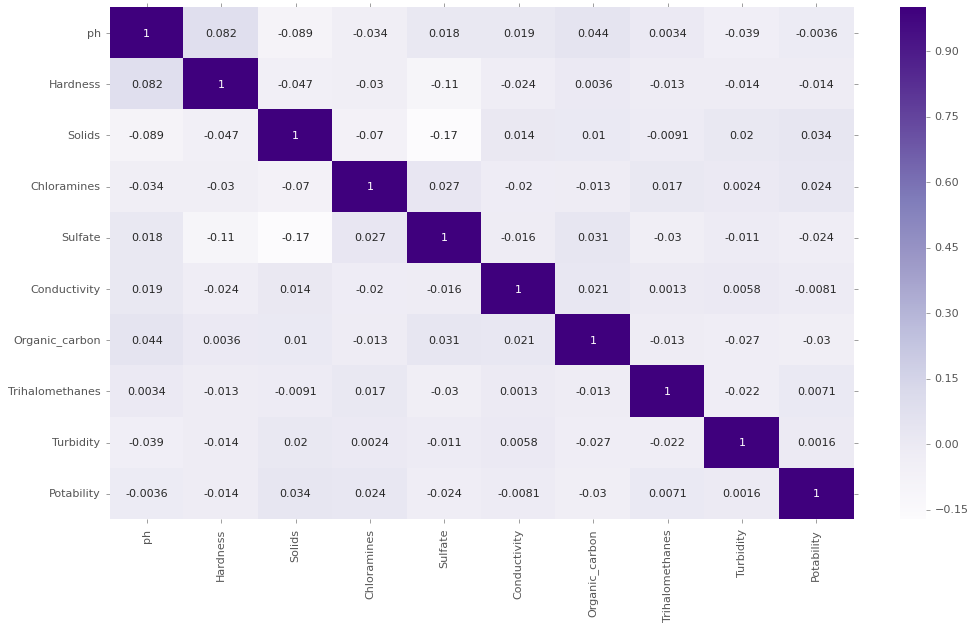

In [55]:
# creating heatmap to see any possible correlations
plt.figure(figsize = (15,8))
correlations = df.corr();
sns.heatmap(correlations, cmap='Purples' , annot=True);

As the Heatmap shows, there does not appear to be any values that would showcase a correlation between any two features. Every Value is closer to zero than anything that it appears no features are correlated. Beacause of this plotting two features vs each other won't make the most of sense. 

In [91]:
# creating a function in order to display median value above the bar
def mean_label(x_pos, y_val, adj):
  plt.text(x_pos, (y_val + adj), s=y_val, ha="center")

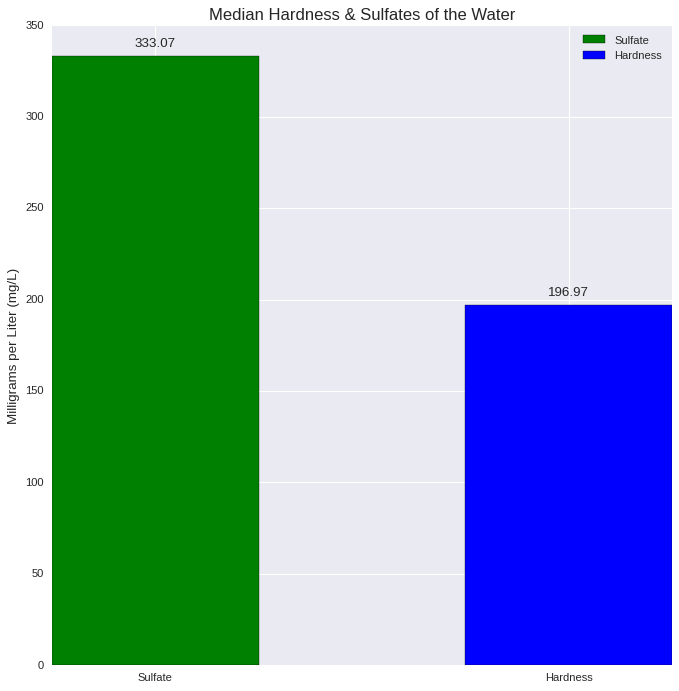

In [92]:
# Creating a multivariate bar chart for the features that are in the same units 
# and comparing their medians. 

# start by making a copy of the df since I'll be calculating medians for 
# Hardness and Sulfate  
df2 = df.copy()

# Creating varibales to store median values 

sulfate = round(df2['Sulfate'].median(), 2)
hardness = round(df2['Hardness'].median(), 2)
x_s = 'Sulfate'
x_h = 'Hardness'
# setting width of bar and plot size and styling
plt.style.use('seaborn')
bar_width = 0.5
fig = plt.subplots(figsize=(10,10))

# creating the barplots and adding legends, axis labels, title, and bar values
plt.bar(x_s, sulfate, color='g', width=bar_width, 
        edgecolor='black', label='Sulfate');
plt.bar(x_h, hardness, color='b', width=bar_width, 
        edgecolor='black', label='Hardness');
plt.legend();
mean_label(x_s, sulfate, 5);
mean_label(x_h, hardness, 5);
plt.ylabel('Milligrams per Liter (mg/L)', fontdict={'fontsize':12})
plt.title('Median Hardness & Sulfates of the Water', fontdict={'fontsize':15});

7.13


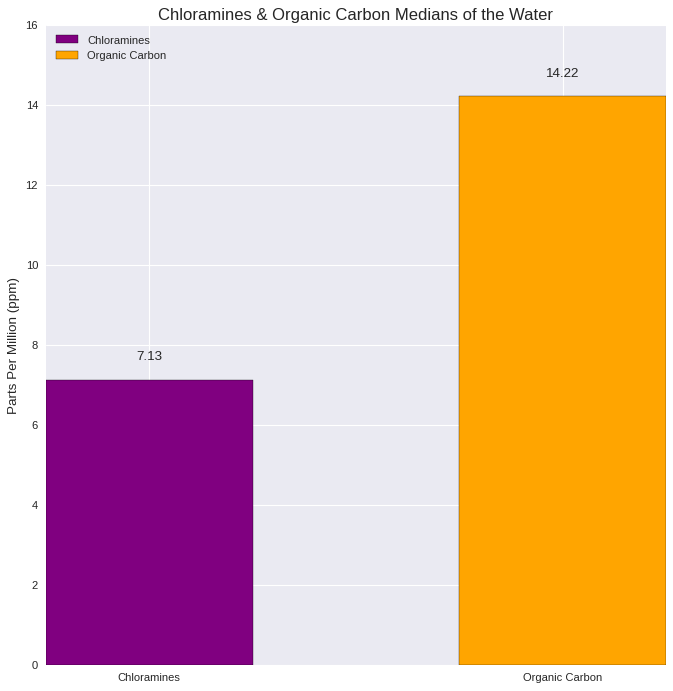

In [96]:
# Creating a multivariate bar chart for the features that are in the same units 
# and comparing their medians. 

# Creating varibales to store median values 
x_c = 'Chloramines'
x_oc = 'Organic Carbon'
chloramines = round(df2[x_c].median(), 2)
org_carbon = round(df2['Organic_carbon'].median(), 2)
print(chloramines)
# setting width of bar and plot size and styling
plt.style.use('seaborn')
bar_width = 0.5
fig = plt.subplots(figsize=(10,10))

# creating the barplots and adding legends, axis labels, title, and bar values
plt.bar(x_c, chloramines, color='purple', width=bar_width, 
        edgecolor='black', label=x_c);
plt.bar(x_oc, org_carbon, color='orange', width=bar_width, 
        edgecolor='black', label=x_oc);
plt.legend(loc='upper left');
mean_label(x_c, chloramines, 0.5);
mean_label(x_oc, org_carbon, 0.5);
plt.ylabel('Parts Per Million (ppm)', fontdict={'fontsize':12})
plt.title('Chloramines & Organic Carbon Medians of the Water', 
          fontdict={'fontsize':15});